In [1]:

from more_itertools import sliced
import re
import numpy as np
import pandas as pd
import time


from nltk.tokenize import sent_tokenize
from nltk import *


from IPython.display import clear_output

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

import torch
from torchtext import data
import torch.nn as nn

import seaborn as sns

import spacy
import os

In [2]:
flash = pd.read_csv("flashback_158001_171000.csv")
flash

,link,forum,title,date,username,text
0,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-25, 23:13",Ni-MH,"\n\t\t\t\tHej, för ett tag sedan så såg jag på..."
1,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 06:49",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...
2,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 08:17",hycklaren,\n\t\t\t\tJag har hört att det ska vara jättes...
3,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 08:30",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...
4,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-27, 00:46",hycklaren,\n\t\t\t\tHar du belägg för att jag inte har b...
...,...,...,...,...,...,...
344031,https://www.flashback.org/t170999p1,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 00:42\t",P3tter,\n\t\t\t\tOmöjligt att göra en sån lista ju.\r...
344032,https://www.flashback.org/t170999p1,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 00:48\t",Ballonggreven,\n\t\t\t\tHar sysselsatt mig vid en tidpunkt m...
344033,https://www.flashback.org/t170999p2,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 09:42\t",Galning,\n\t\t\t\t1 Casablanca \n\r\n2 Riddarfalken fr...
344034,https://www.flashback.org/t170999p2,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 14:35\t",buiko,\n\t\t\t\tJag läste en del inlägg och kom fram...


# Spacy modellen laddas nedanför

In [3]:
# Load swedish spacy model
# fungerar bara med senaste varianten av spacy
#C:\\Users\\GTSA - Infinity\\Downloads\\sv_model_upos\\sv_model_upos\\sv_model0\\sv_model_upos

nlp = spacy.load("C:\\Users\\GTSA - Infinity\\Downloads\\sv_model_upos\\sv_model_upos\\sv_model0\\sv_model_upos")

In [8]:
# The big file

flash = pd.read_csv("FlASH_ALLT.csv")
flash

,link,forum,title,date,username,text
0,https://www.flashback.org/t30000p1,Dator och ITIT-säkerhet,Hackers,"2001-06-22, 15:51",Bong (old),\n\t\t\t\tJag vet inte mycket om datorsäkerhet...
1,https://www.flashback.org/t30000p1,Dator och ITIT-säkerhet,Hackers,"2001-06-22, 16:00",NaN,\n\t\t\t\tDDoS\n\t\t\t
2,https://www.flashback.org/t30000p1,Dator och ITIT-säkerhet,Hackers,"2001-06-22, 16:10",Bong (old),\n\t\t\t\tDDoS? Är det en överbelastningsatta...
3,https://www.flashback.org/t30000p1,Dator och ITIT-säkerhet,Hackers,"2001-06-22, 17:18",zero (old),\n\t\t\t\tDistributed Denial of Service?\n\r\n...
4,https://www.flashback.org/t30001p1,Dator och ITIT-säkerhet,LAN,"2001-06-22, 17:21",zero (old),"\n\t\t\t\tDu kan spela nätverksspel, det är ga..."
...,...,...,...,...,...,...
2186632,https://www.flashback.org/t170999p1,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 00:42\t",P3tter,\n\t\t\t\tOmöjligt att göra en sån lista ju.\r...
2186633,https://www.flashback.org/t170999p1,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 00:48\t",Ballonggreven,\n\t\t\t\tHar sysselsatt mig vid en tidpunkt m...
2186634,https://www.flashback.org/t170999p2,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 09:42\t",Galning,\n\t\t\t\t1 Casablanca \n\r\n2 Riddarfalken fr...
2186635,https://www.flashback.org/t170999p2,Kultur & MediaFilm och filmproduktionFilm: all...,Tidernas bästa filmer,"2004-12-29, 14:35\t",buiko,\n\t\t\t\tJag läste en del inlägg och kom fram...


# Count how many citations there are in a post

The function below will count how many citations there are in each post, I will then select only the post that have 1 citation.

In [4]:


def count_string(search_string, column):
    """
        takes the string you want to count and the column/text that you want to search 
        returns: int, The number of occurences for the search_string in the text 
        
    """
    column_string = str(column)
    answer = column_string.count(search_string)
    return answer

In [5]:
# apply the function to the whole dataframe
flash['count_citat'] = flash.apply(lambda row: count_string("Citat:\n\n\n\t\t\tUrsprungligen postat av", row["text"]), axis=1)

In [6]:
flash["count_citat"].value_counts()

0     220592
1     118582
2       3295
3        777
4        340
5        197
6        115
7         38
8         36
9         21
10        12
12         8
11         7
13         5
15         4
16         2
20         1
17         1
18         1
19         1
21         1
Name: count_citat, dtype: int64

In [7]:
# create new dataframe with only 1 citation in each post

citat_flash = flash[flash["count_citat"] == 1]
citat_flash

,link,forum,title,date,username,text,count_citat
1,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 06:49",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
3,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 08:30",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
8,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-27, 07:25",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
12,https://www.flashback.org/t158002p1,Vetenskap & humanioraKemi och pyroteknik,Boktips,"2004-10-26, 18:18",starkpåknark,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
13,https://www.flashback.org/t158002p1,Vetenskap & humanioraKemi och pyroteknik,Boktips,"2004-10-26, 21:04",Franz-jaeger,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
...,...,...,...,...,...,...,...
344005,https://www.flashback.org/t170994p1,DrogerDopning och dopningspreparat,Behöver AKUT hjälp,"2004-12-30, 00:23\t",cosmopolitian,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
344006,https://www.flashback.org/t170994p1,DrogerDopning och dopningspreparat,Behöver AKUT hjälp,"2004-12-30, 01:09\t",%,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
344010,https://www.flashback.org/t170994p2,DrogerDopning och dopningspreparat,Behöver AKUT hjälp,"2004-12-30, 20:18\t",s1 sport,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1
344013,https://www.flashback.org/t170995p1,"Dator och ITTelefoni, surfplattor och läsplattor",Strul med Motorola A925,"2004-12-28, 20:49",gonimbe,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1


## Function that split a string in two given a ceartin string exist
The function below split a string into two if some kind of choosen string exist inside the string

In [8]:
# function to create

def get_citat(text):
    s = str(text)
    try:
        # if succes then there is a citat
        citat, svar = s.split('\n\n\n\r\n', 1)
        return citat
    except:
        return ""
    
    
def get_svar(text):
    s = str(text)
    try:
        # if succes then there is a citat
        citat, svar = s.split('\n\n\n\r\n', 1)
        return svar
    except:
        return ""

In [9]:
citat_flash['citat'] = citat_flash.apply(lambda row: get_citat(row["text"]), axis=1)
citat_flash['svar'] = citat_flash.apply(lambda row: get_svar(row["text"]), axis=1)
citat_flash

<ipython-input-9-5e36b1d4c5d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citat_flash['citat'] = citat_flash.apply(lambda row: get_citat(row["text"]), axis=1)
<ipython-input-9-5e36b1d4c5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citat_flash['svar'] = citat_flash.apply(lambda row: get_svar(row["text"]), axis=1)


,link,forum,title,date,username,text,count_citat,citat,svar
1,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 06:49",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,I Sverige så är det ytterst ovanligt att man k...
3,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-26, 08:30",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Varför kan du aldrig svara på en fråga kort oc...
8,https://www.flashback.org/t158001p1,SamhälleJuridik,Byta advokat?,"2004-10-27, 07:25",Pellefant,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Ibland kan man undra om du är riktigt frisk. A...
12,https://www.flashback.org/t158002p1,Vetenskap & humanioraKemi och pyroteknik,Boktips,"2004-10-26, 18:18",starkpåknark,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Du kan med största sannolikhet be din lokala b...
13,https://www.flashback.org/t158002p1,Vetenskap & humanioraKemi och pyroteknik,Boktips,"2004-10-26, 21:04",Franz-jaeger,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Letade efter denna bok på bokus.se Hittade end...
...,...,...,...,...,...,...,...,...,...
344005,https://www.flashback.org/t170994p1,DrogerDopning och dopningspreparat,Behöver AKUT hjälp,"2004-12-30, 00:23\t",cosmopolitian,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,De tungt. men min kurr kostade nästan 10lax so...
344006,https://www.flashback.org/t170994p1,DrogerDopning och dopningspreparat,Behöver AKUT hjälp,"2004-12-30, 01:09\t",%,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Vilken idiot! Det är strängligen förbjudet att...
344010,https://www.flashback.org/t170994p2,DrogerDopning och dopningspreparat,Behöver AKUT hjälp,"2004-12-30, 20:18\t",s1 sport,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,mina saker ligger i ett låst skåp jag har barn...
344013,https://www.flashback.org/t170995p1,"Dator och ITTelefoni, surfplattor och läsplattor",Strul med Motorola A925,"2004-12-28, 20:49",gonimbe,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,då hade jag rätt =)\r\njag trodde nästa detta...


In [10]:
# create a new dataset that only have the citat and svar
svar_df = citat_flash.iloc[:,7:9]
svar_df

,citat,svar
1,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,I Sverige så är det ytterst ovanligt att man k...
3,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Varför kan du aldrig svara på en fråga kort oc...
8,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Ibland kan man undra om du är riktigt frisk. A...
12,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Du kan med största sannolikhet be din lokala b...
13,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Letade efter denna bok på bokus.se Hittade end...
...,...,...
344005,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,De tungt. men min kurr kostade nästan 10lax so...
344006,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,Vilken idiot! Det är strängligen förbjudet att...
344010,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,mina saker ligger i ett låst skåp jag har barn...
344013,\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av ...,då hade jag rätt =)\r\njag trodde nästa detta...


In [11]:
# Remove the part of the citat that always starts the same
# 38 from the start and 5 from the end
citat_flash.iloc[4,5][38:]


'starkpåknark\n\nEn bok som de flesta som kallar sig pyrotekniker såväl som experter inom organisk kemi borde äga heter "Pyrotechnics". Många äger väl(liksom jag): Herbert Ellern\x92s Military and Civilian Pyrotechnics. Jag tror Ellerns bok kom ut i slutet på 60-talet och säljer fortfarande bra.\n\r\nMEN! Ellerns bok är grymt förlegad jämfört med Alexander Harts "Pyrotechnics". Den här killen jobbade i 27 år på "Lockheed Palo Alto Research Laboratory" och jobbade med bland annat spårljusammunition och raketdrivna katapultstolar...(!)\n\r\nDenna bok är helt absurdt bra. Leta på nätet efter recensioner. Han tar upp allting om varför ämnen reagerar som de gör, vilka ämnen som är giftiga och varför de är giftiga. Lär man sig den här boken utantill, ja då kan man allt som en av USA\'s bästa hjärnor inom området sprängämnen och ammunition och allehanda pyrotekniska applikationer kunde(han dog tyvärr kort före hans bok publicerades). Dr. Shimizu(eller vad fan han heter) har bidragit med ett k

In [12]:
citat_flash.iloc[0,5]

'\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av Ni-MH\n\nHej, för ett tag sedan så såg jag på Discovery där det handlade om någon mördare eller liknande som blev tagen, men när rättegången började så stälde han sig upp och sa att han ville ha nya/ny advokat.\r\nRättegången blev inställd, blev en ny efter en lång tid. Han gjorde samma igen, och igen.\r\nJag tror att han inte fick byta advokat längre i slutet eller något liknande, detta gjorde att allt blev försenat flera år och vitten dog osv.\n\r\nMen detta var på 70 talet tror jag, får man/kan man göra liknande saker idag i sverige/usa?\n\n\n\r\nI Sverige så är det ytterst ovanligt att man kan få rätt att få byta offentlig försvarare.\n\t\t\t'

In [13]:
citat_flash.iloc[4,5]

'\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av starkpåknark\n\nEn bok som de flesta som kallar sig pyrotekniker såväl som experter inom organisk kemi borde äga heter "Pyrotechnics". Många äger väl(liksom jag): Herbert Ellern\x92s Military and Civilian Pyrotechnics. Jag tror Ellerns bok kom ut i slutet på 60-talet och säljer fortfarande bra.\n\r\nMEN! Ellerns bok är grymt förlegad jämfört med Alexander Harts "Pyrotechnics". Den här killen jobbade i 27 år på "Lockheed Palo Alto Research Laboratory" och jobbade med bland annat spårljusammunition och raketdrivna katapultstolar...(!)\n\r\nDenna bok är helt absurdt bra. Leta på nätet efter recensioner. Han tar upp allting om varför ämnen reagerar som de gör, vilka ämnen som är giftiga och varför de är giftiga. Lär man sig den här boken utantill, ja då kan man allt som en av USA\'s bästa hjärnor inom området sprängämnen och ammunition och allehanda pyrotekniska applikationer kunde(han dog tyvärr kort före hans bok publicerades). Dr. Shimizu(e

In [14]:
# Function that removes the first space of a string, so taht Citat: Urspungligen postad av is removed
def remove_words(text, start):
    return text[start:]

In [15]:
# before removing the first part of the string
svar_df.iloc[0,0]

'\n\nCitat:\n\n\n\t\t\tUrsprungligen postat av Ni-MH\n\nHej, för ett tag sedan så såg jag på Discovery där det handlade om någon mördare eller liknande som blev tagen, men när rättegången började så stälde han sig upp och sa att han ville ha nya/ny advokat.\r\nRättegången blev inställd, blev en ny efter en lång tid. Han gjorde samma igen, och igen.\r\nJag tror att han inte fick byta advokat längre i slutet eller något liknande, detta gjorde att allt blev försenat flera år och vitten dog osv.\n\r\nMen detta var på 70 talet tror jag, får man/kan man göra liknande saker idag i sverige/usa?'

In [16]:
#use the function from above
svar_df["citat"] = svar_df.apply(lambda row: remove_words(row["citat"],38), axis=1)
svar_df

,citat,svar
1,"Ni-MH\n\nHej, för ett tag sedan så såg jag på ...",I Sverige så är det ytterst ovanligt att man k...
3,hycklaren\n\nJag har hört att det ska vara jät...,Varför kan du aldrig svara på en fråga kort oc...
8,"hycklaren\n\nNääää, förresten.\n\r\nLyssna på ...",Ibland kan man undra om du är riktigt frisk. A...
12,iceman_88\n\nFinns boken att få tag i någon bo...,Du kan med största sannolikhet be din lokala b...
13,starkpåknark\n\nEn bok som de flesta som kalla...,Letade efter denna bok på bokus.se Hittade end...
...,...,...
344005,Nilsson-86\n\nnär pappa och mamma hitta mina s...,De tungt. men min kurr kostade nästan 10lax so...
344006,cosmopolitian\n\nDe tungt. men min kurr kostad...,Vilken idiot! Det är strängligen förbjudet att...
344010,_J0nas_\n\nGrabbar har ni inte lärt er att göm...,mina saker ligger i ett låst skåp jag har barn...
344013,Kalaspuffar\n\nangående spelen ärdet bara att ...,då hade jag rätt =)\r\njag trodde nästa detta...


In [17]:
# After
svar_df.iloc[0,0]


'Ni-MH\n\nHej, för ett tag sedan så såg jag på Discovery där det handlade om någon mördare eller liknande som blev tagen, men när rättegången började så stälde han sig upp och sa att han ville ha nya/ny advokat.\r\nRättegången blev inställd, blev en ny efter en lång tid. Han gjorde samma igen, och igen.\r\nJag tror att han inte fick byta advokat längre i slutet eller något liknande, detta gjorde att allt blev försenat flera år och vitten dog osv.\n\r\nMen detta var på 70 talet tror jag, får man/kan man göra liknande saker idag i sverige/usa?'

Function to find a specific charater and remove all the words before 
by using the find method


In [18]:
def remove_before(text, char):
    index = text.find(char)  #find the first occurence of the word
    return text[index:]   #removes everything before the word

# testing
remove_before(svar_df.iloc[0,0], "\n")

'\n\nHej, för ett tag sedan så såg jag på Discovery där det handlade om någon mördare eller liknande som blev tagen, men när rättegången började så stälde han sig upp och sa att han ville ha nya/ny advokat.\r\nRättegången blev inställd, blev en ny efter en lång tid. Han gjorde samma igen, och igen.\r\nJag tror att han inte fick byta advokat längre i slutet eller något liknande, detta gjorde att allt blev försenat flera år och vitten dog osv.\n\r\nMen detta var på 70 talet tror jag, får man/kan man göra liknande saker idag i sverige/usa?'

In [19]:
svar_df["citat"] = svar_df.apply(lambda row: remove_before(row["citat"],"\n"), axis=1)
svar_df

,citat,svar
1,"\n\nHej, för ett tag sedan så såg jag på Disco...",I Sverige så är det ytterst ovanligt att man k...
3,\n\nJag har hört att det ska vara jättesvårt a...,Varför kan du aldrig svara på en fråga kort oc...
8,"\n\nNääää, förresten.\n\r\nLyssna på pellefant...",Ibland kan man undra om du är riktigt frisk. A...
12,\n\nFinns boken att få tag i någon bokhandel e...,Du kan med största sannolikhet be din lokala b...
13,\n\nEn bok som de flesta som kallar sig pyrote...,Letade efter denna bok på bokus.se Hittade end...
...,...,...
344005,"\n\nnär pappa och mamma hitta mina sprutor, så...",De tungt. men min kurr kostade nästan 10lax so...
344006,\n\nDe tungt. men min kurr kostade nästan 10la...,Vilken idiot! Det är strängligen förbjudet att...
344010,\n\nGrabbar har ni inte lärt er att gömma sake...,mina saker ligger i ett låst skåp jag har barn...
344013,\n\nangående spelen ärdet bara att gå in i näs...,då hade jag rätt =)\r\njag trodde nästa detta...


In [20]:

# count the words for citat and svar, remove the outliners 
svar_df["citat_count"] = svar_df['citat'].str.findall(r'(\w+)').str.len()
svar_df["svar_count"] = svar_df['svar'].str.findall(r'(\w+)').str.len()

# The count could be 0 if the user only posted emoji or images
svar_df= svar_df[svar_df["svar_count"]> 0]
svar_df= svar_df[svar_df["citat_count"]> 0]
svar_df


,citat,svar,citat_count,svar_count
1,"\n\nHej, för ett tag sedan så såg jag på Disco...",I Sverige så är det ytterst ovanligt att man k...,100,17
3,\n\nJag har hört att det ska vara jättesvårt a...,Varför kan du aldrig svara på en fråga kort oc...,87,30
8,"\n\nNääää, förresten.\n\r\nLyssna på pellefant...",Ibland kan man undra om du är riktigt frisk. A...,74,133
12,\n\nFinns boken att få tag i någon bokhandel e...,Du kan med största sannolikhet be din lokala b...,14,48
13,\n\nEn bok som de flesta som kallar sig pyrote...,Letade efter denna bok på bokus.se Hittade end...,200,41
...,...,...,...,...
344005,"\n\nnär pappa och mamma hitta mina sprutor, så...",De tungt. men min kurr kostade nästan 10lax so...,41,19
344006,\n\nDe tungt. men min kurr kostade nästan 10la...,Vilken idiot! Det är strängligen förbjudet att...,19,25
344010,\n\nGrabbar har ni inte lärt er att gömma sake...,mina saker ligger i ett låst skåp jag har barn...,63,16
344013,\n\nangående spelen ärdet bara att gå in i näs...,då hade jag rätt =)\r\njag trodde nästa detta...,23,28


C:\Users\GTSA - Infinity\Anaconda3\envs\Spacy\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


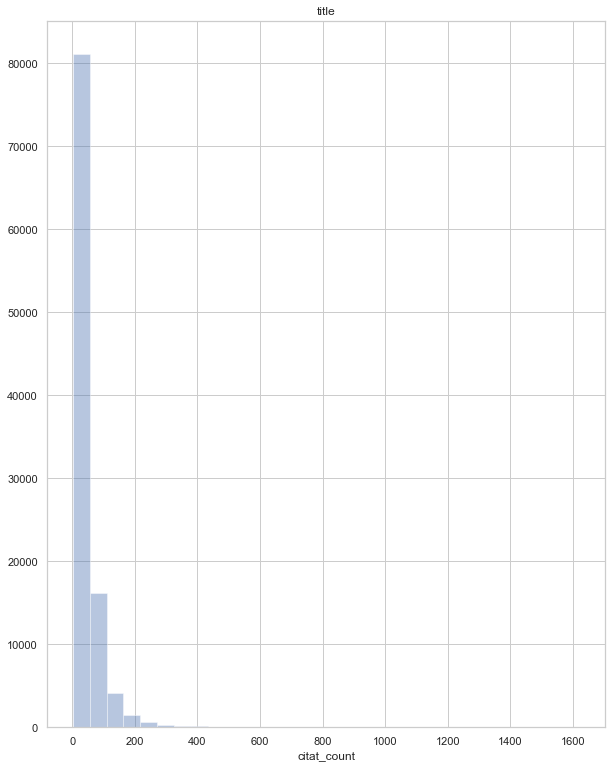

In [21]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 13))
g = sns.distplot(svar_df["citat_count"], bins=30, kde=False, rug=False)
#g.set(xlim=(0,20000))
plt.title("title")
plt.show(g)

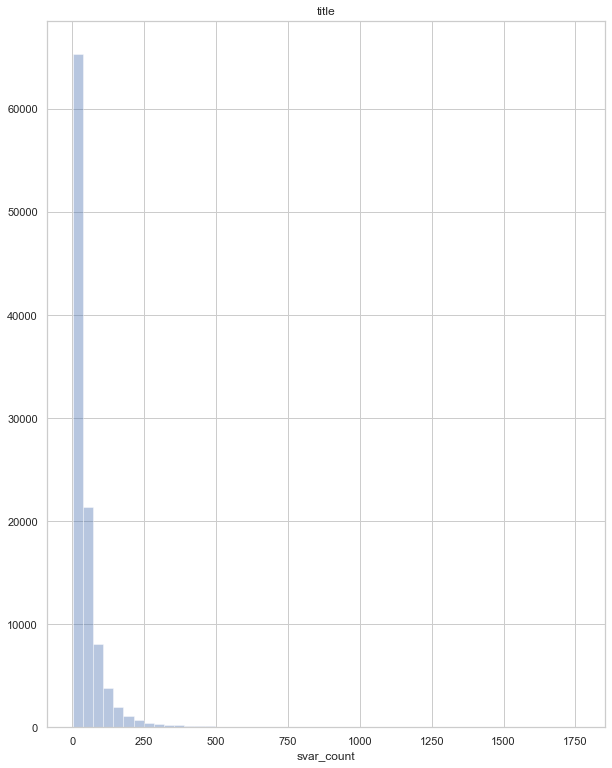

In [22]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 13))
g = sns.distplot(svar_df["svar_count"], bins=50, kde=False, rug=False)
#g.set(xlim=(0,20000))
plt.title("title")
plt.show(g)

In [23]:
svar_df = svar_df[svar_df["citat_count"]< 100]
svar_df = svar_df[svar_df["svar_count"]< 100]

C:\Users\GTSA - Infinity\Anaconda3\envs\Spacy\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


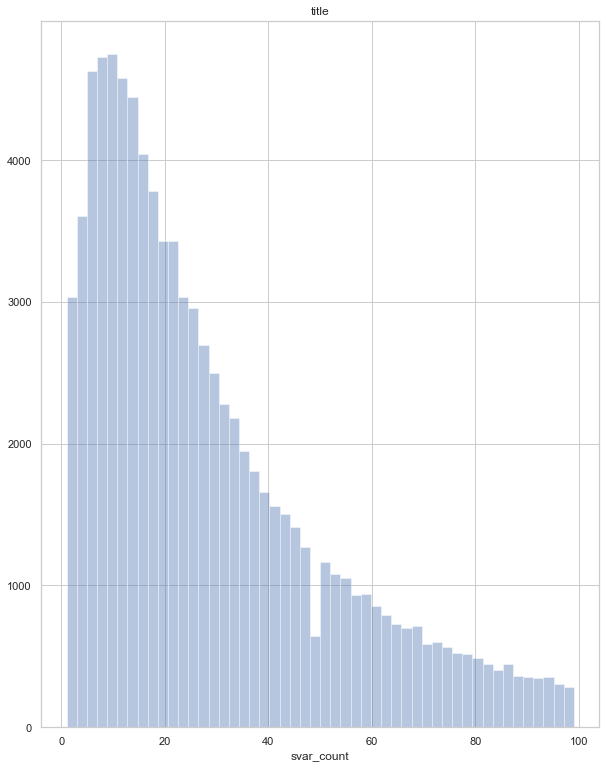

In [24]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 13))
g = sns.distplot(svar_df["svar_count"], bins=50, kde=False, rug=False)
#g.set(xlim=(0,20000))
plt.title("title")
plt.show(g)

In [25]:
svar_df 

,citat,svar,citat_count,svar_count
3,\n\nJag har hört att det ska vara jättesvårt a...,Varför kan du aldrig svara på en fråga kort oc...,87,30
12,\n\nFinns boken att få tag i någon bokhandel e...,Du kan med största sannolikhet be din lokala b...,14,48
15,\n\nKan datorn fastna i felsäkerläge? Har förs...,Vad händer om du trycker på F8 - eller vilken ...,35,27
16,\n\nKan datorn fastna i felsäkerläge? Har förs...,"Start Menyn -> Kör -> ""Msconfig""\r\nin på flik...",35,21
17,"\n\nStart Menyn -> Kör -> ""Msconfig""\r\nin på ...",Tackar!! Ska testa det....\n\t\t\t,21,4
...,...,...,...,...
344003,\n\nGör det saken BÄTTRE att man skulle sälja ...,Javisst! \r\nBlir det ett jävla liv så måste m...,10,54
344005,"\n\nnär pappa och mamma hitta mina sprutor, så...",De tungt. men min kurr kostade nästan 10lax so...,41,19
344006,\n\nDe tungt. men min kurr kostade nästan 10la...,Vilken idiot! Det är strängligen förbjudet att...,19,25
344010,\n\nGrabbar har ni inte lärt er att gömma sake...,mina saker ligger i ett låst skåp jag har barn...,63,16


In [26]:
#make the strings lower case
svar_df["citat"] = svar_df["citat"].str.lower()
svar_df["svar"] = svar_df["svar"].str.lower()


# removes newline and more
svar_df["citat"] = svar_df["citat"].replace('\n',' ', regex=True)
svar_df["svar"] = svar_df["svar"].replace('\n',' ', regex=True)

# remove \r
svar_df["citat"] = svar_df["citat"].replace('\r',' ', regex=True)
svar_df["svar"] = svar_df["svar"].replace('\r',' ', regex=True)

# remove another word
svar_df["citat"] = svar_df["citat"].replace('tl;dr',' ', regex=True)
svar_df["svar"] = svar_df["svar"].replace('tl;dr',' ', regex=True)

# Remove whitespaces
svar_df["citat"] = svar_df["citat"].str.strip()
svar_df["svar"] = svar_df["svar"].str.strip()


In [27]:
svar_df

,citat,svar,citat_count,svar_count
3,jag har hört att det ska vara jättesvårt att b...,varför kan du aldrig svara på en fråga kort oc...,87,30
12,finns boken att få tag i någon bokhandel eller...,du kan med största sannolikhet be din lokala b...,14,48
15,kan datorn fastna i felsäkerläge? har försökt ...,vad händer om du trycker på f8 - eller vilken ...,35,27
16,kan datorn fastna i felsäkerläge? har försökt ...,"start menyn -> kör -> ""msconfig"" in på fliken...",35,21
17,"start menyn -> kör -> ""msconfig"" in på fliken...",tackar!! ska testa det....,21,4
...,...,...,...,...
344003,gör det saken bättre att man skulle sälja det ...,javisst! blir det ett jävla liv så måste man...,10,54
344005,"när pappa och mamma hitta mina sprutor, så ble...",de tungt. men min kurr kostade nästan 10lax so...,41,19
344006,de tungt. men min kurr kostade nästan 10lax so...,vilken idiot! det är strängligen förbjudet att...,19,25
344010,grabbar har ni inte lärt er att gömma sakerna ...,mina saker ligger i ett låst skåp jag har barn...,63,16
